In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from pathlib import Path

plt.style.use("default")
plt.rc("text", usetex=True)
plt.rc("font", family="cm")
plt.rcParams["grid.color"] = (0.5, 0.5, 0.5, 0.2)

In [2]:
with open('/home/ferracci/new_dataset/xgb_results.txt', 'r') as f:
    file_xgb_content = f.read()

with open('/home/ferracci/new_dataset/fcdnn_results.txt', 'r') as f:
    file_fc_content = f.read()

with open('/home/ferracci/new_dataset/1dcnn_results.txt', 'r') as f:
    file_1d_content = f.read()

features_xgb_list = file_xgb_content.split('\n')
bias_xgb = eval(features_xgb_list[0])
res_xgb = eval(features_xgb_list[1])
err_bias_xgb = eval(features_xgb_list[2])
err_res_xgb = eval(features_xgb_list[3])

features_fc_list = file_fc_content.split('\n')
bias_fc = eval(features_fc_list[0])
res_fc = eval(features_fc_list[1])
err_bias_fc = eval(features_fc_list[2])
err_res_fc = eval(features_fc_list[3])

features_1d_list = file_1d_content.split('\n')
bias_1d = eval(features_1d_list[0])
res_1d = eval(features_1d_list[1])
err_bias_1d = eval(features_1d_list[2])
err_res_1d = eval(features_1d_list[3])

y_test_files = list(Path("/mnt/ferracci/").glob("targets_dataframe_test_*"))
y_test = []
for y_test_file in y_test_files:
    y_test.append(np.array(pd.read_csv(y_test_file)["Qedep"]))

idx_energies = np.array([0, 1, 10, 7, 6, 2, 0.1, 9, 5, 3, 8, 4, 0.3, 0.6])
y_test = [x for _, x in sorted(zip(idx_energies, y_test))]
energies = [np.mean(y_test[i]) for i in range(len(y_test))]

In [3]:
from helper_functions.model_evaluation import energy_res_func 
from helper_functions.model_evaluation import energy_res_fit

a_xgb, b_xgb, c_xgb, _ = energy_res_fit(energies[1:-1], res_xgb[1:-1], err_res_xgb[1:-1])
a_fc, b_fc, c_fc, _ = energy_res_fit(energies[1:-1], res_fc[1:-1], err_res_fc[1:-1])
a_1d, b_1d, c_1d, _ = energy_res_fit(energies[1:-2], res_1d[1:-2], err_res_1d[1:-2])

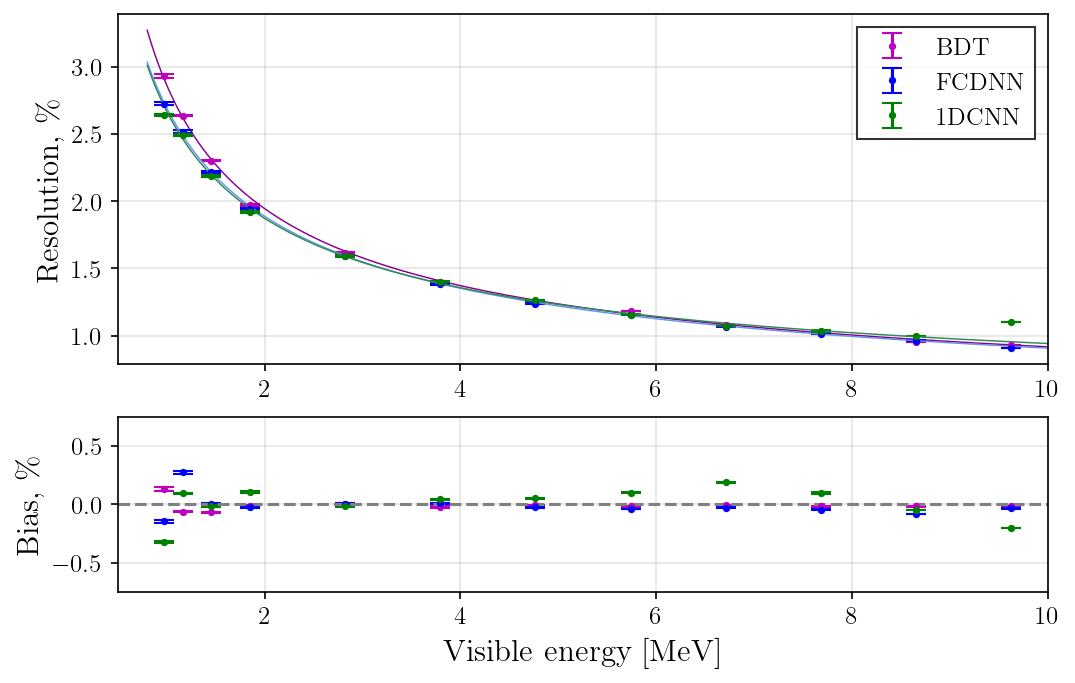

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), dpi=150, gridspec_kw={'height_ratios': [2, 1]})

x = np.linspace(0.8, 10, 1000)

ax = axes[0]
ax.errorbar(energies[1:-1], res_xgb[1:-1], yerr=err_res_xgb[1:-1], fmt="m.", markersize=5, capsize=5, label="BDT")
ax.plot(x, energy_res_func(x, a_xgb, b_xgb, c_xgb), lw=0.7, color="darkmagenta")
ax.errorbar(energies[1:-1], res_fc[1:-1], yerr=err_res_fc[1:-1], fmt="b.", markersize=5, capsize=5, label="FCDNN")
ax.plot(x, energy_res_func(x, a_fc, b_fc, c_fc), lw=0.7, color="cornflowerblue")
ax.errorbar(energies[1:-1], res_1d[1:-1], yerr=err_res_1d[1:-1], fmt="g.", markersize=5, capsize=5, label="1DCNN")
ax.plot(x, energy_res_func(x, a_1d, b_1d, c_1d), lw=0.7, color="seagreen")
ax.set_ylabel("Resolution, \%", fontsize=15)
ax.set_xlim([0.5, 10])
ax.tick_params(axis="both", which="major", labelsize=12)
ax.tick_params(axis="both", which='minor', labelsize=12)
ax.legend(prop={'size': 12}, fancybox=False, edgecolor="k", loc="upper right")
ax.grid()

ax = axes[1]
ax.errorbar(energies[1:-1], bias_xgb[1:-1], yerr=err_bias_xgb[1:-1], fmt="m.", markersize=5, capsize=5)
ax.errorbar(energies[1:-1], bias_fc[1:-1], yerr=err_bias_fc[1:-1], fmt="b.", markersize=5, capsize=5)
ax.errorbar(energies[1:-1], bias_1d[1:-1], yerr=err_bias_1d[1:-1], fmt="g.", markersize=5, capsize=5)
ax.axhline(0, ls="--", color="gray")
ax.set_xlabel("Visible energy [MeV]", fontsize=15)
ax.set_ylabel("Bias, \%", fontsize=15)
ax.set_xlim([0.5, 10])
ax.set_ylim([-0.75, 0.75])
ax.tick_params(axis="both", which="major", labelsize=12)
ax.tick_params(axis="both", which='minor', labelsize=12)
ax.grid()

fig.savefig("/home/ferracci/new_dataset/images/results.png", dpi=300, bbox_inches="tight", pad_inches=0.2);